# IMPLICIT FINITE DIFFERENTIAL  #

/var/folders/ns/mpvw51ks38d4mhyvftrjjkrm0000gn/T/ipykernel_79106/4214416311.py:42: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  c = spsolve(A, c)


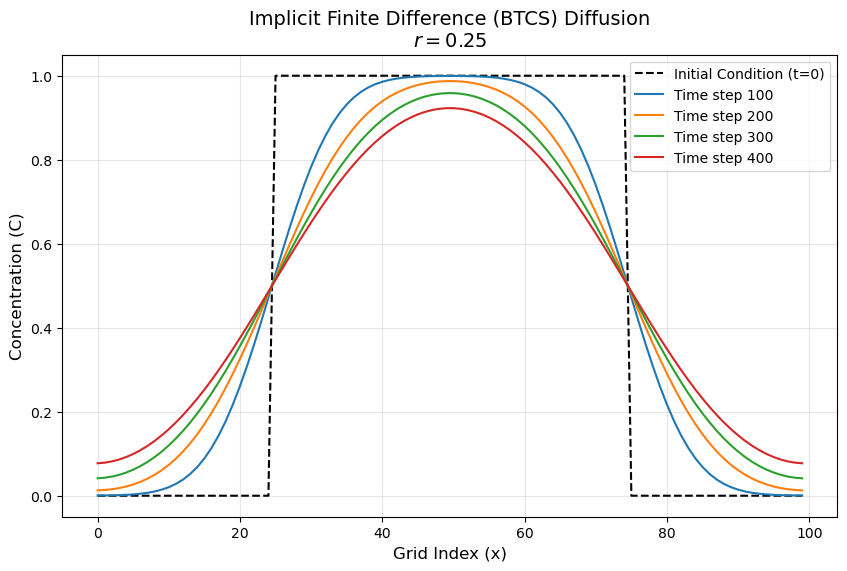

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

#  1. Parameters 
nx = 100            #
nt = 400            # Number of timesteps to observe diffusion
D = 1.0             #
dx = 1.0            #
dt = 0.25           #
r = (D * dt) / (dx**2) #

# 2. Initial Condition (IC)

c = np.zeros(nx)
c[25:75] = 1.0

# 3. Constructing the Implicit System 
# -r*c[i-1, t+dt] + (1+2r)*c[i, t+dt] - r*c[i+1, t+dt] = c[i, t]

#  the diagonals for the coefficient matrix A
main_diag = (1 + 2*r) * np.ones(nx)
off_diag = -r * np.ones(nx - 1)

# Build the tridiagonal matrix
A = diags([off_diag, main_diag, off_diag], [-1, 0, 1]).toarray()

# 4. Periodic Boundary Conditions 
A[0, -1] = -r
A[-1, 0] = -r

# 5. Time Stepping (Solving the System) 
plt.figure(figsize=(10, 6))
plt.plot(c, label="Initial Condition (t=0)", color="black", linestyle="--")

for t in range(1, nt + 1):
    # Solve the linear system: A * c_next = c_current
    c = spsolve(A, c)
    
    # Plot at every 100 time steps
    if t % 100 == 0:
        plt.plot(c, label=f"Time step {t}")

# --- 6. Finalizing the Plot ---
[Image of the implicit finite difference solution for 1D diffusion]
plt.title(f"Implicit Finite Difference (BTCS) Diffusion\n$r = {r}$", fontsize=14)
plt.xlabel("Grid Index (x)", fontsize=12)
plt.ylabel("Concentration (C)", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

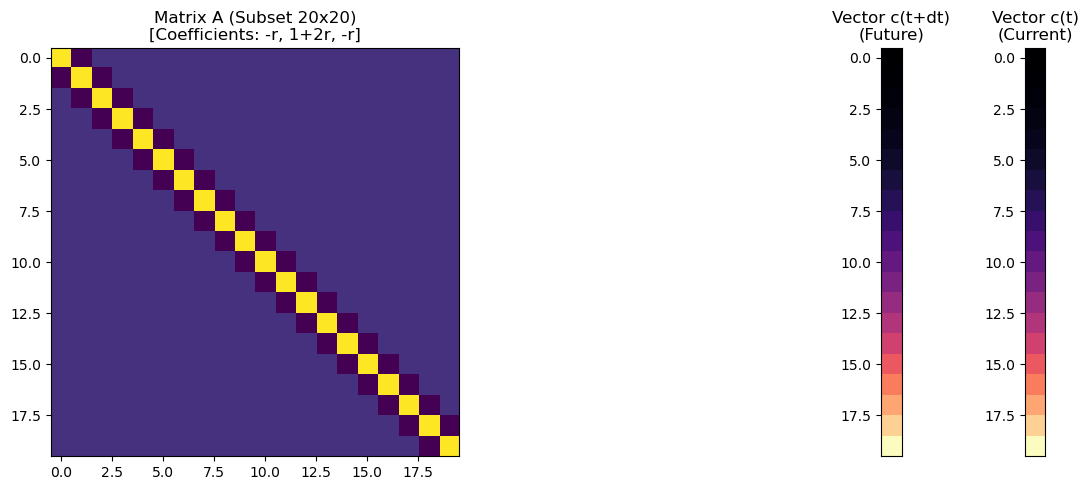

In [5]:
def display_matrices_logic(A, c_next, c_current):
    """
    Displays the relationship: [A] * [c_next] = [c_current]
    """
    fig, axes = plt.subplots(1, 3, figsize=(15, 5), gridspec_kw={'width_ratios': [3, 0.5, 0.5]})

    # Matrix A
    axes[0].imshow(A[:20, :20], cmap='viridis')
    axes[0].set_title("Matrix A (Subset 20x20)\n[Coefficients: -r, 1+2r, -r]")

    # Vector c^{t+dt} (The unknown we solve for)
    axes[1].imshow(c_next[:20].reshape(-1, 1), cmap='magma')
    axes[1].set_title("Vector c(t+dt)\n(Future)")
    axes[1].set_xticks([])

    # Vector c^{t} (The known current state)
    axes[2].imshow(c_current[:20].reshape(-1, 1), cmap='magma')
    axes[2].set_title("Vector c(t)\n(Current)")
    axes[2].set_xticks([])

    plt.tight_layout()
    plt.show()

# Run the display for the current state
display_matrices_logic(A, c, c) # Note: after spsolve, c is the 'future' state

First 5x5 corner of Matrix A (showing periodic wrap-around):
[[ 1.5  -0.25  0.    0.    0.  ]
 [-0.25  1.5  -0.25  0.    0.  ]
 [ 0.   -0.25  1.5  -0.25  0.  ]
 [ 0.    0.   -0.25  1.5  -0.25]
 [ 0.    0.    0.   -0.25  1.5 ]]

Periodic link (A[0, -1]): -0.25


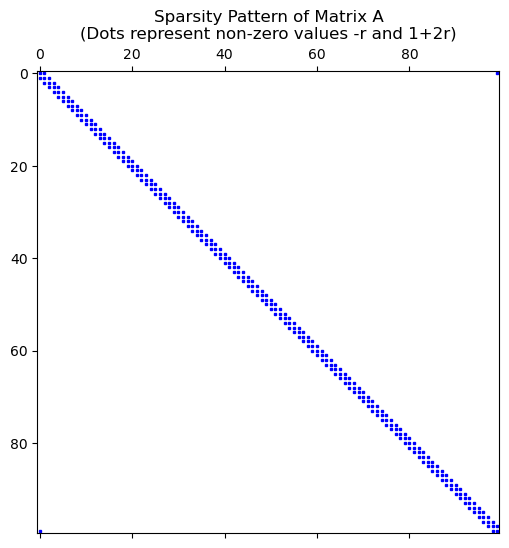

In [6]:
# --- Displaying the A Matrix Structure ---
print("First 5x5 corner of Matrix A (showing periodic wrap-around):")
# Use indexing to show the top-left corner and the periodic top-right corner
print(A[:5, :5])
print("\nPeriodic link (A[0, -1]):", A[0, -1])

# Visual representation of the matrix sparsity
plt.figure(figsize=(6, 6))
plt.spy(A, markersize=2, color='blue')
plt.title("Sparsity Pattern of Matrix A\n(Dots represent non-zero values -r and 1+2r)")
plt.show()

# SEMI IMPLICIT FINITE DIFFERENTIAL #

/var/folders/ns/mpvw51ks38d4mhyvftrjjkrm0000gn/T/ipykernel_79106/3457579589.py:30: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  c = spsolve(A, B @ c)


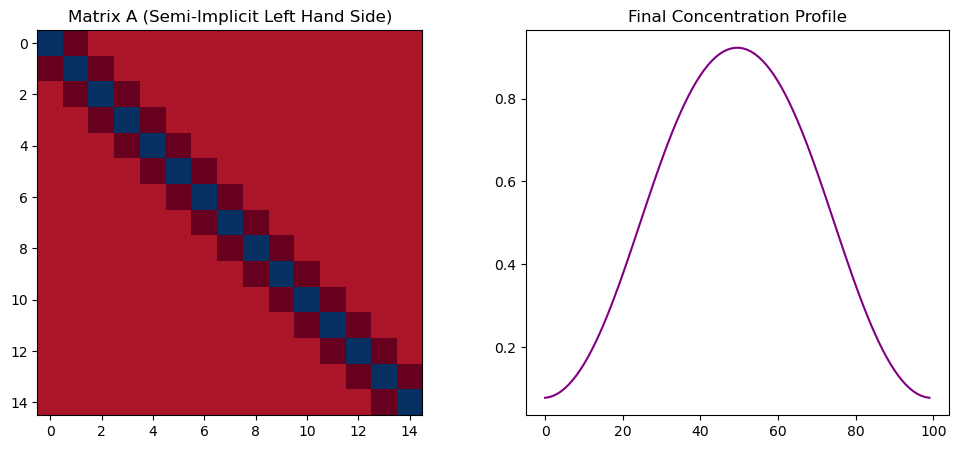

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

# Parameters
nx, nt = 100, 400
D, dt, dx = 1.0, 0.25, 1.0
r = (D * dt) / (dx**2)

# Matrices A and B for: A * c_next = B * c_now
# Matrix A (Implicit part)
diag_a = (1 + r) * np.ones(nx)
off_a = (-r / 2) * np.ones(nx - 1)
A = diags([off_a, diag_a, off_a], [-1, 0, 1]).toarray()
A[0, -1] = A[-1, 0] = -r / 2 # Periodic BCs

# Matrix B (Explicit part)
diag_b = (1 - r) * np.ones(nx)
off_b = (r / 2) * np.ones(nx - 1)
B = diags([off_b, diag_b, off_b], [-1, 0, 1]).toarray()
B[0, -1] = B[-1, 0] = r / 2 # Periodic BCs

# Initial Condition
c = np.zeros(nx)
c[25:75] = 1.0

# Time Stepping
for t in range(nt):
    c = spsolve(A, B @ c)

# Visualization of A, B, and result
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(A[:15, :15], cmap='RdBu')
ax[0].set_title("Matrix A (Semi-Implicit Left Hand Side)")
ax[1].plot(c, color='purple')
ax[1].set_title("Final Concentration Profile")
plt.show()